In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
#import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
observation_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])
observation_df.head()
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [50]:
# Checking the number of mice.
num_mice = observation_df["Mouse ID"].nunique()
num_mice

249

In [51]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_row = observation_df.loc[observation_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_row

array(['g989'], dtype=object)

In [52]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_row=observation_df.loc[observation_df["Mouse ID"] == "g989"]
duplicates_row


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [53]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = observation_df[observation_df["Mouse ID"].isin(duplicate_row)==False]
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [54]:
# Checking the number of mice in the clean DataFrame.
count_mice = clean_df["Mouse ID"].nunique()
count_mice


248

## Summary Statistics

In [55]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_regimen_gp = clean_df.groupby("Drug Regimen")
print(drug_regimen_gp["Mouse ID"].count())
mean = drug_regimen_gp["Tumor Volume (mm3)"].mean()
median = drug_regimen_gp["Tumor Volume (mm3)"].median()
variance = drug_regimen_gp["Tumor Volume (mm3)"].var()
standard_dv = drug_regimen_gp["Tumor Volume (mm3)"].std()
sem = drug_regimen_gp["Tumor Volume (mm3)"].sem()

summary_df =pd.DataFrame({"Mean": mean,"Median": median,"Variance":variance, "Standard Deviation":standard_dv, "SEM":sem})
summary_df

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [56]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
Aggregation = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
Aggregation

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

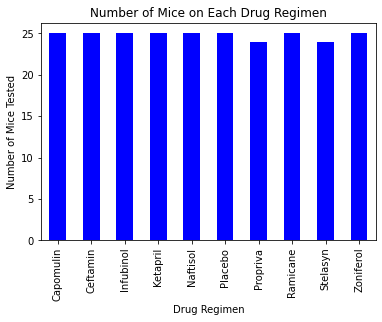

In [57]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_tested = clean_df.groupby(["Drug Regimen"])["Mouse ID"].nunique()
axis = mice_tested.plot(kind="bar",title = "Number of Mice on Each Drug Regimen" , facecolor="blue") 
axis.set_ylabel("Number of Mice Tested")


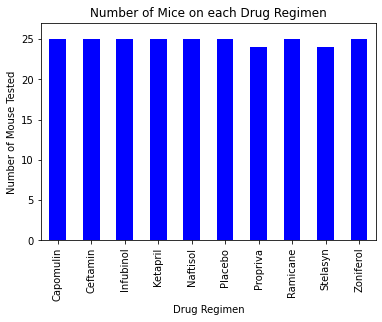

In [62]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
reg = clean_df.groupby("Drug Regimen")["Mouse ID"].nunique()

tick_locations = []
for x in x_axis:
    tick_locations.append(x)
plt.title("Number of Mice on each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse Tested")

plt.xlim(-0.5, len(mice_tested)-0.5)
plt.ylim(0,mice_tested.max() +2)

plt.bar(reg.index, reg, facecolor="blue",align="center",width=0.5)
plt.xticks(tick_locations, reg.index,rotation="vertical")
plt.show()

Male      125
Female    123
Name: Sex, dtype: int64

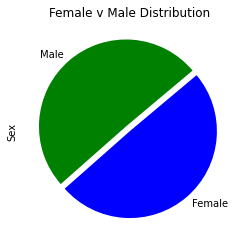

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender= clean_df[["Mouse ID","Sex"]].drop_duplicates()

colors = ["green","blue"]
explode = (.07,0)

sex = gender["Sex"].value_counts()
p = sex.plot(kind="pie", title="Female v Male Distribution",colors=colors, startangle=40, explode=explode)
sex


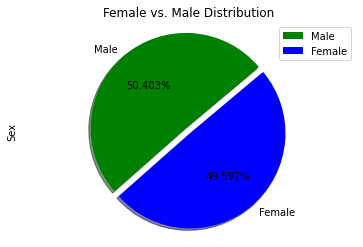

In [80]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex, labels=sex.index,colors=colors,autopct="%1.3f%%", shadow=True, startangle=40, explode=explode)
plt.axis("equal")
plt.title("Female vs. Male Distribution")
plt.ylabel("Sex")
plt.legend(loc= "upper right")
plt.show()


## Quartiles, Outliers and Boxplots

In [116]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin","Ramicane","Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tvd = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
      # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_list:
    Vol_df = Tu_vol_df.loc[Tu_vol_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]    
    tvd.append(Vol_df)
    quartiles = Vol_df.quantile([0.25,0.5,0.75])
   
    # add subset 
    iqr = quartiles[0.75] - quartiles[0.25] 
    
   # Determine outliers using upper and lower bounds
lower_bounds = quartiles[0.25] - (1.5*iqr)
upper_bounds = quartiles[0.75] + (1.5*iqr)

outliers = Vol_df.loc[(Vol_df > upper_bounds) | (Vol_df < lower_bounds)]

In [117]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
time= clean_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Tu_vol_df = pd.merge(clean_df,time, how="inner", on=["Mouse ID", "Timepoint"])

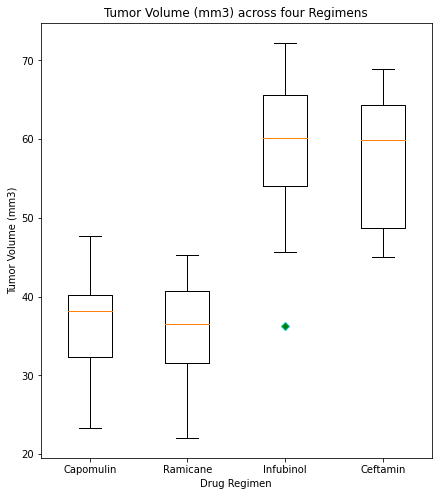

In [115]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
green_dot = dict(markerfacecolor="g", marker="D", markeredgecolor="c")
fig1, ax1 = plt.subplots(figsize=(7,8))
ax1.boxplot(tvd, flierprops=green_dot)
ax1.set_title("Tumor Volume (mm3) across four Regimens")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.xaxis.set(ticks=range(1,len(drug_list) + 1),ticklabels=drug_list)

plt.show()


## Line and Scatter Plots

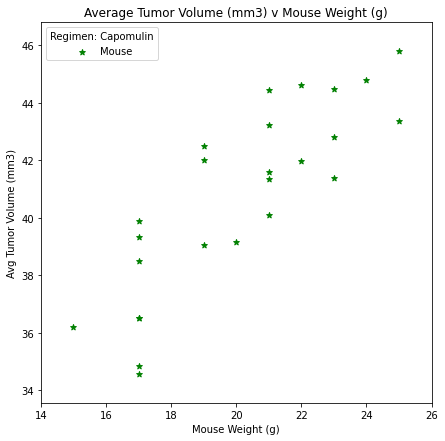

In [130]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Cap_Reg = clean_df.loc[clean_df["Drug Regimen"]== "Capomulin"]
tu_volume = Cap_Reg.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
mouse_weight = Cap_Reg.groupby(["Mouse ID"])["Weight (g)"].mean()

mouse_wt = pd.merge(tu_volume,mouse_weight, on="Mouse ID", how="inner")
mouse_wt = mouse_wt.rename(columns={"Tumor Volume (mm3)": "Avg Tumor Volume (mm3)"})
vol = mouse_wt.iloc[:,0]
wt = mouse_wt.iloc[:,1]

fig, ax = plt.subplots(figsize=(7,7))
ax.set_autoscale_on(True)
ax.scatter(wt, vol, marker="*", facecolors="green", edgecolors="green")
ax.legend(["Mouse"],loc="upper left", title="Regimen: Capomulin")
plt.title("Average Tumor Volume (mm3) v Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")
plt.ylim(vol.min() - 1, vol.max() + 1)
plt.xlim(wt.min() - 1, wt.max() + 1)

plt.show()

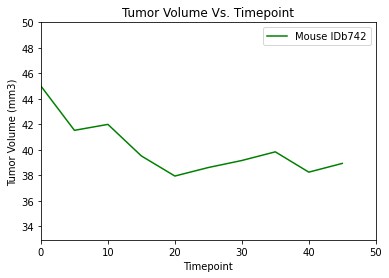

In [124]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Cap_mouse = (clean_df[clean_df["Drug Regimen"]=="Capomulin"]).sample()
Data = pd.merge(clean_df, Cap_mouse, on="Mouse ID", how="inner")
Data_df = Data.drop([col for col in Data.columns if '_y' in col], axis=1)

time = Data_df["Timepoint_x"]
vol = Data_df["Tumor Volume (mm3)_x"]
label = Data_df["Mouse ID"].unique()

#print
line, = plt.plot(time, vol, "g-")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Vs. Timepoint")
plt.xlim(0, time.max() + 5)
plt.ylim(vol.min() - 5, vol.max() + 5)
plt.legend("Mouse ID" +label)
plt.show()


## Correlation and Regression

In [148]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation_coefficient = round(st.pearsonr(wt, vol)[0],2)
print(f"The correlation coefficient between Average Tumor Volume and Mouse Weight is {correlation_coefficient}")



The correlation coefficient between Average Tumor Volume and Mouse Weight is 0.84


y = 0.95x + 21.55


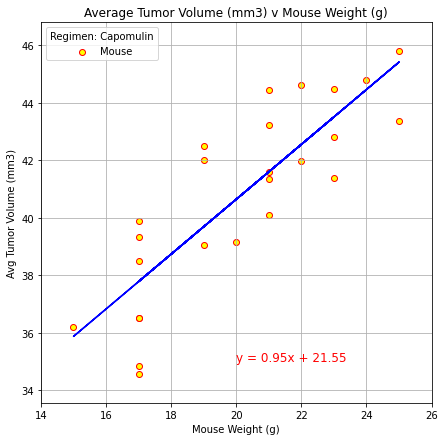

In [152]:
#linear regression model
slope, intercept, rvalue, pvalue, std_err = st.linregress(wt, vol)

#create equation of line
line = slope * wt + intercept
equation = f"y = {round(slope,2)}x + {round(intercept,2)}" 
print(equation)

#plot linear model on top of scatter plot
fig, ax = plt.subplots(figsize=(7,7))
ax.set_autoscale_on(True)
ax.scatter(wt, vol, marker="o", edgecolors="red", facecolors="yellow")
ax.legend(["Mouse"],loc="upper left", title="Regimen: Capomulin")


plt.plot(wt, line, 'b-')
plt.title("Average Tumor Volume (mm3) v Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")
plt.ylim(vol.min() - 1, vol.max() + 1)
plt.xlim(wt.min() - 1, wt.max() + 1)
plt.annotate(equation, (20,35), fontsize=12, color="red")
plt.grid()
plt.show()

## Observations and Insights 

It appears per the bar graph that the drugs Propriva & Stelasyn both didn't have 25 mice tested on their drugs. The number of male to female mice was very close almost even, but slight advantage going to the male mice at 50.4% vs. 49.6%. The Drug Regimen data frame shows that Ramicane had the lowest numbers(mean, median, variance, standard deviation, and SEM). It appears that from the four drugs that were tested Infubinol, and Ceftamin had the highest Tumor Volume and Infubinol had an outlier with a average tumor downwards. The linear regression graph shows us as the Mouses weignt increased the avg tumor volume increases as well.   